In [6]:
import numpy as np
import pandas as pd
import os
import cmcrameri.cm as cmc
from datetime import date
import matplotlib.pyplot as plt
import argparse
import scipy
import seaborn as sns



In [7]:
N_min=10
N_max=500
diff_min=1
diff_max=5


prevalence_ls=[0.0001,0.0005,0.001,0.005,0.01,0.05]

In [8]:
# Build a dataframe with columns: N, Diff, prevalence, p_error
results = []
for diff in np.arange(int(diff_min), int(diff_max+1)):
    for N in np.arange(int(N_min), int(N_max+1)):
        for prevalence in prevalence_ls:
            # Compute probability of at least one error (1 - P(no error))
            p_error = 1 - scipy.stats.binom.cdf(diff-1, N, prevalence)
            results.append({'N': N, 'Diff': diff, 'prevalence': prevalence, 'p_error': p_error})
df_results = pd.DataFrame(results)
df_results.head()

,N,Diff,prevalence,p_error
0,10,1,0.0001,0.001000
1,10,1,0.0005,0.004989
2,10,1,0.0010,0.009955
3,10,1,0.0050,0.048890
4,10,1,0.0100,0.095618


/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-

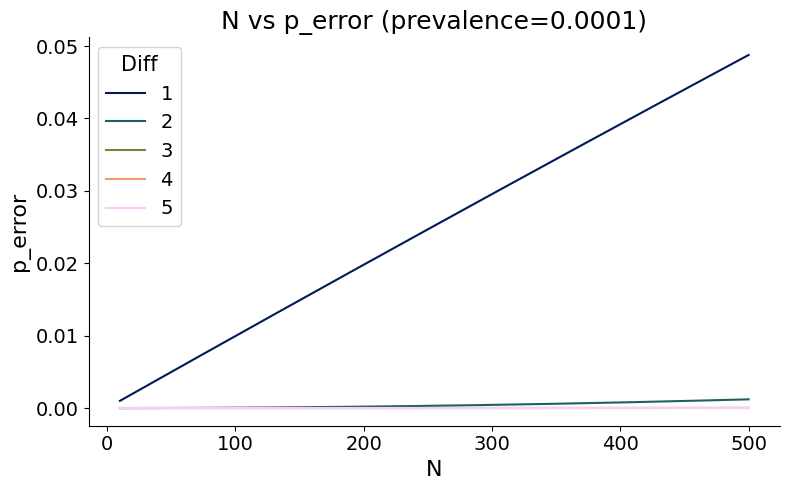

/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-

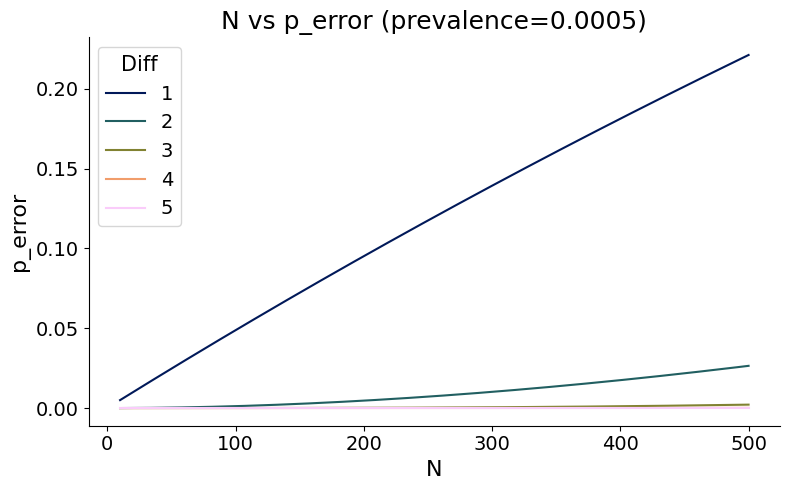

/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-

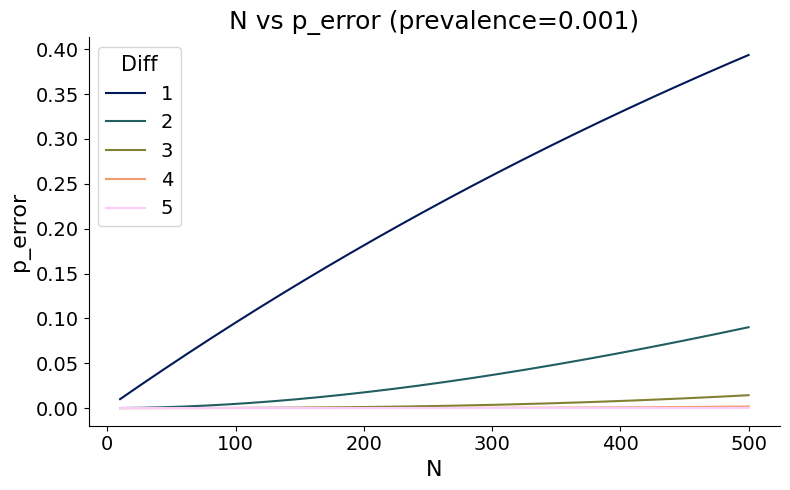

/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-

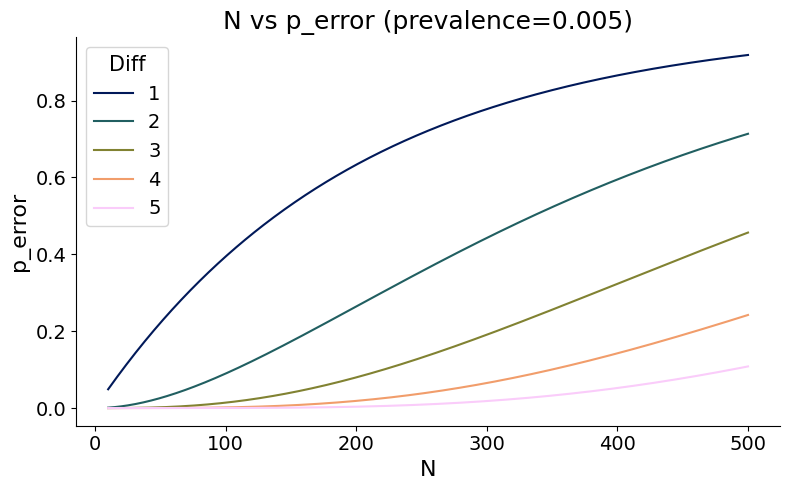

/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-

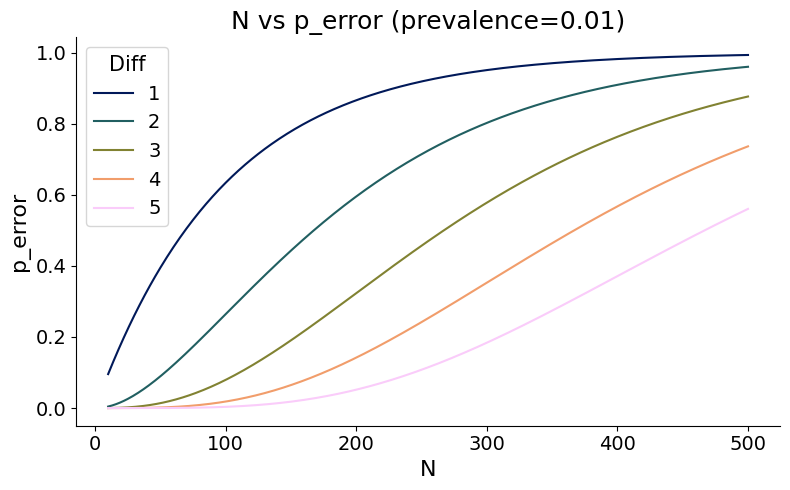

/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-

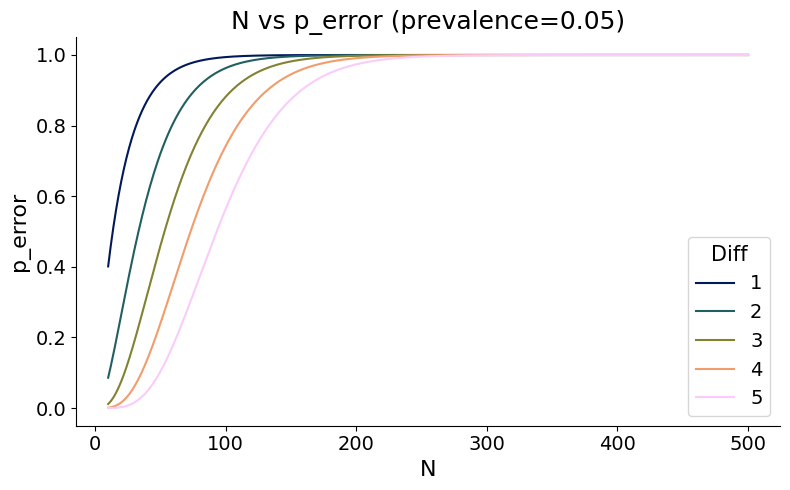

/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-

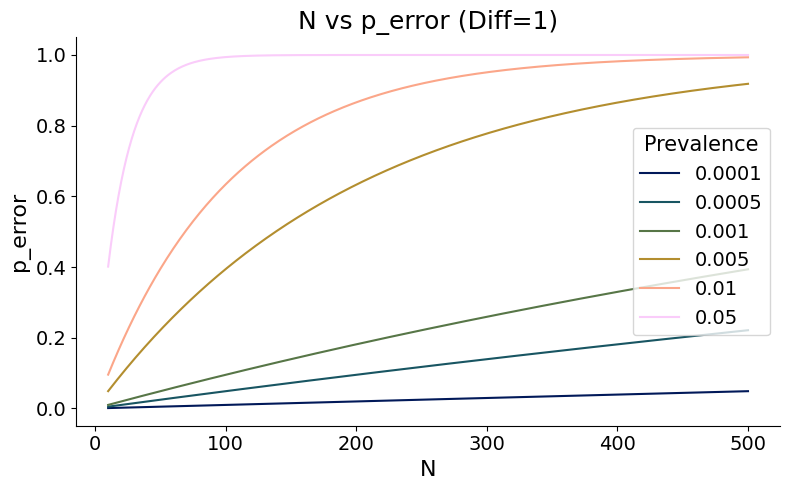

/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-

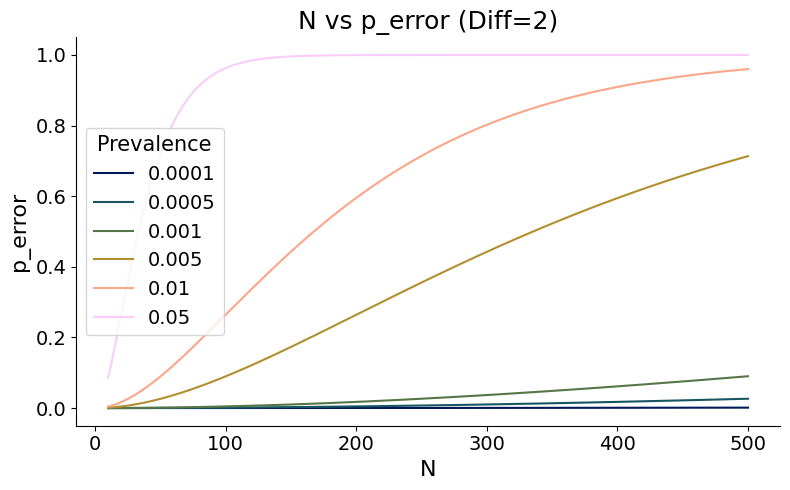

/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-

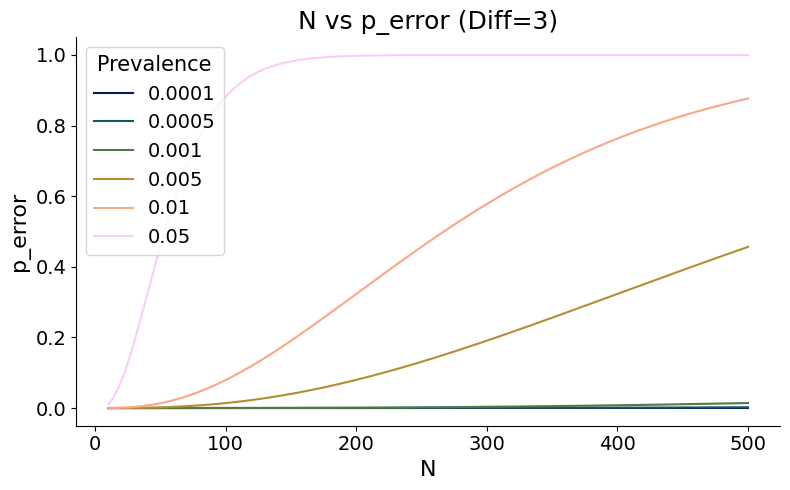

/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-

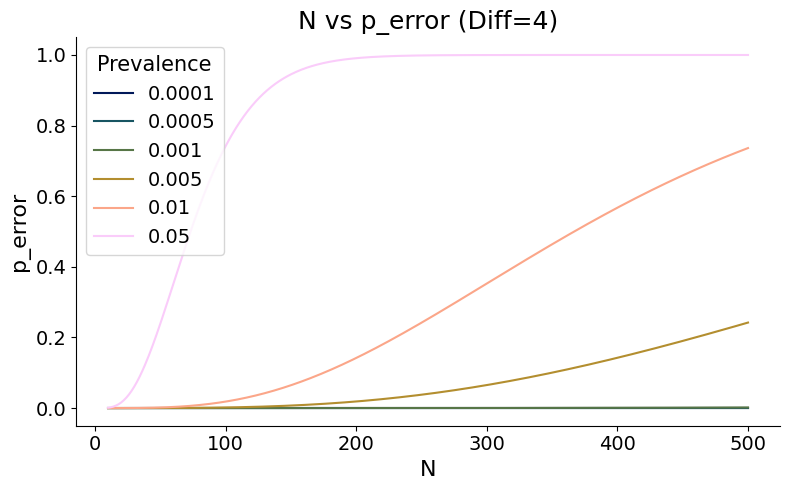

/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/ltalamanca/uv_2/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-

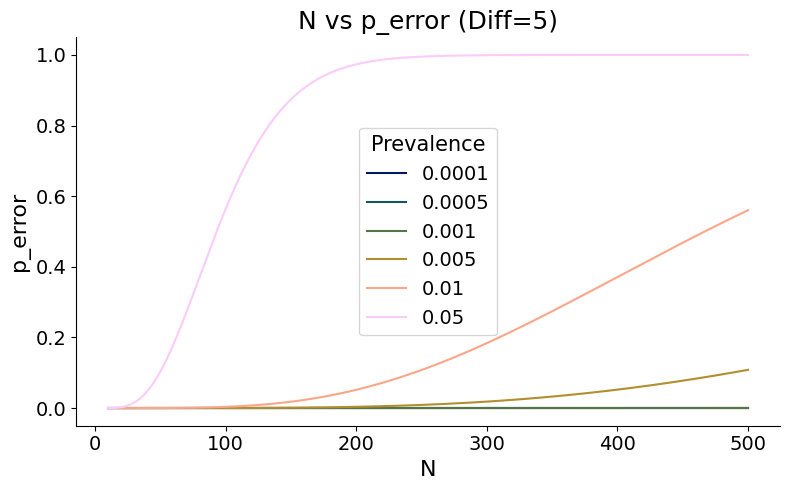

In [ ]:
import matplotlib as mpl
import numpy as np
import os
import warnings

# Suppress FutureWarnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Convert batlow colormap to hex colors for seaborn
batlow_hex = [mpl.colors.to_hex(c) for c in cmc.batlow.colors]

# Helper to sample palette uniformly
def sample_palette(palette, n):
    idxs = np.linspace(0, len(palette)-1, n, dtype=int)
    return [palette[i] for i in idxs]

# Ensure prevalence directory exists
prevalence_dir = os.path.join(os.getcwd(), 'prevalence')
os.makedirs(prevalence_dir, exist_ok=True)

# Save the table to the prevalence directory
csv_path = os.path.join(prevalence_dir, 'prevalence_results.csv')
df_results.to_csv(csv_path, index=False)

# Plot 1: One plot per prevalence, color by diff using crameri batlow colormap
for i, prevalence in enumerate(df_results['prevalence'].unique()):
    plt.figure(figsize=(8,5))
    subset = df_results[df_results['prevalence'] == prevalence]
    n_colors = subset['Diff'].nunique()
    palette = sample_palette(batlow_hex, n_colors)
    ax = sns.lineplot(data=subset, x='N', y='p_error', hue='Diff', palette=palette)
    plt.title(f'N vs p_error (prevalence={prevalence})', fontsize=18)
    plt.ylabel('p_error', fontsize=16)
    plt.xlabel('N', fontsize=16)
    plt.legend(title='Diff', fontsize=14, title_fontsize=15)
    for spine in ax.spines.values():
        spine.set_visible(False)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plot_file = os.path.join(prevalence_dir, f'N_vs_p_error_prevalence_{prevalence}.png')
    plt.savefig(plot_file, dpi=300)
    plt.show()

# Plot 2: One plot per diff, color by prevalence using crameri batlow colormap
for i, diff in enumerate(df_results['Diff'].unique()):
    plt.figure(figsize=(8,5))
    subset = df_results[df_results['Diff'] == diff]
    n_colors = subset['prevalence'].nunique()
    palette = sample_palette(batlow_hex, n_colors)
    ax = sns.lineplot(data=subset, x='N', y='p_error', hue='prevalence', palette=palette)
    plt.title(f'N vs p_error (Diff={diff})', fontsize=18)
    plt.ylabel('p_error', fontsize=16)
    plt.xlabel('N', fontsize=16)
    plt.legend(title='Prevalence', fontsize=14, title_fontsize=15)
    for spine in ax.spines.values():
        spine.set_visible(False)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plot_file = os.path.join(prevalence_dir, f'N_vs_p_error_Diff_{diff}.png')
    plt.savefig(plot_file, dpi=300)
    plt.show()